# [Amet Vikram]
# Programming Exercise \#2
---

# Preamble

In [ ]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

In [1]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [2]:
df = pd.read_csv("./iot_telemetry_dataset.csv")

### (a)

The given task can be treated as a **supervised learning task.** Depending on our choice, any one of the **Sensor's telemetry variable** that is, **Temperature, humidity, CO, liquid petroleum gas (LPG), smoke, light, and motion** can act as a **response variable** and remainig variables can act as **regressor or predictor variables.** For instance one can choose to predict, the humidity in environment based on the other variables' data. It should be noted that the following task can also be treated as an **Exploratory Data Analysis** task, where one can simply choose to analyze relationship between different telemetry variables' in an environment over a time frame.

### (b)

In [3]:
print(df.info())
display(df.head())
print(f"Total number of data samples : {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB
None


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


Total number of data samples : 405184


### (c)



In [4]:
mac_addr = "00:0f:00:70:91:0a"
print("Number of data samples associated with device {} : {}".format(mac_addr,len(df[df["device"]==mac_addr])))

Number of data samples associated with device 00:0f:00:70:91:0a : 111815



### (d)

In [5]:
mac_addr = "1c:bf:ce:15:ec:4d"
print("Number of data samples associated with device {} : {}".format(mac_addr,len(df[df["device"]==mac_addr])))

Number of data samples associated with device 1c:bf:ce:15:ec:4d : 105918


### (e)

In [6]:
mac_addr = "b8:27:eb:bf:9d:51"
print("Number of data samples associated with device {} : {}".format(mac_addr,len(df[df["device"]==mac_addr])))

Number of data samples associated with device b8:27:eb:bf:9d:51 : 187451


## Problem 1.2

### (a)

                         co       lpg     smoke       temp   humidity
device                                                               
00:0f:00:70:91:0a  0.003527  0.005893  0.015489  19.362552  75.444361
1c:bf:ce:15:ec:4d  0.004183  0.006764  0.017895  26.025511  61.910247
b8:27:eb:bf:9d:51  0.005560  0.008306  0.022288  22.279969  50.814077


                             co           lpg     smoke      temp   humidity
device                                                                      
00:0f:00:70:91:0a  2.186413e-06  2.889406e-06  0.000023  0.414461   3.903790
1c:bf:ce:15:ec:4d  1.026615e-07  1.391555e-07  0.000001  4.106407  80.009308
b8:27:eb:bf:9d:51  3.121552e-07  3.591871e-07  0.000003  0.232230   3.568042




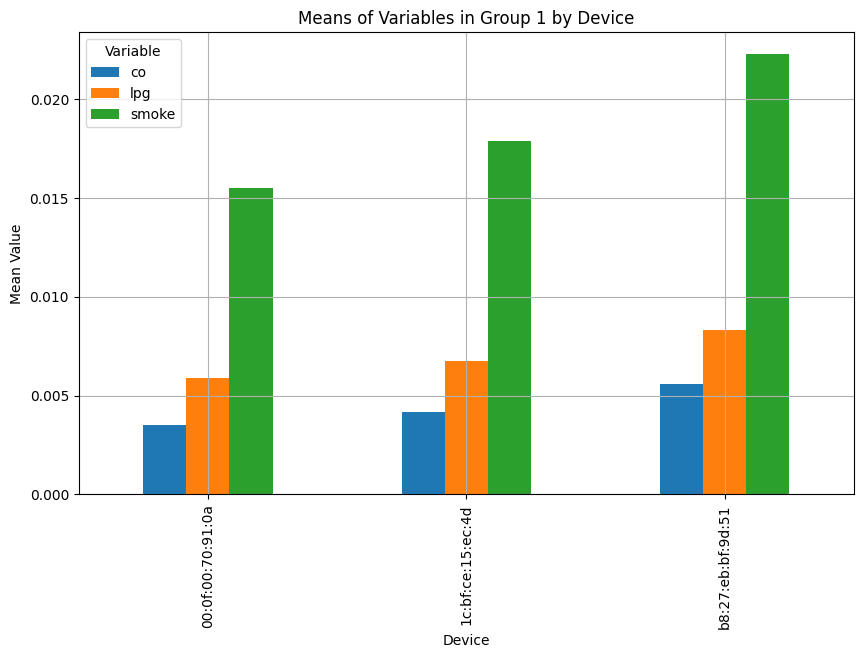

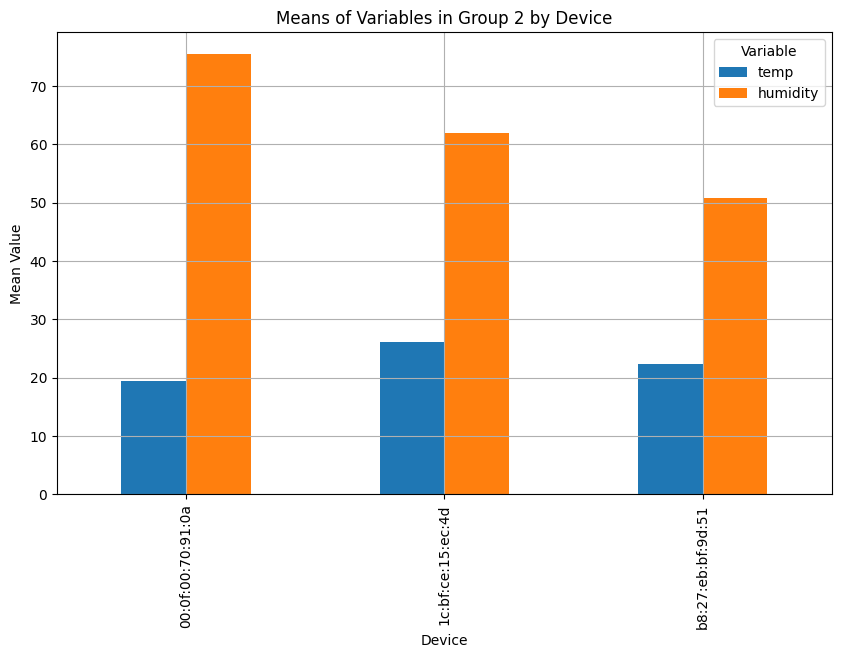

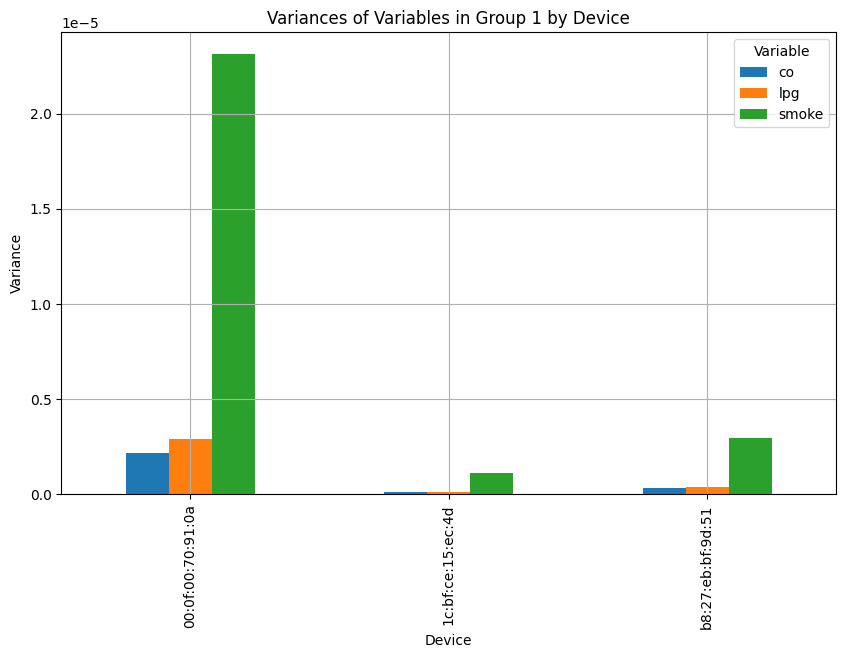

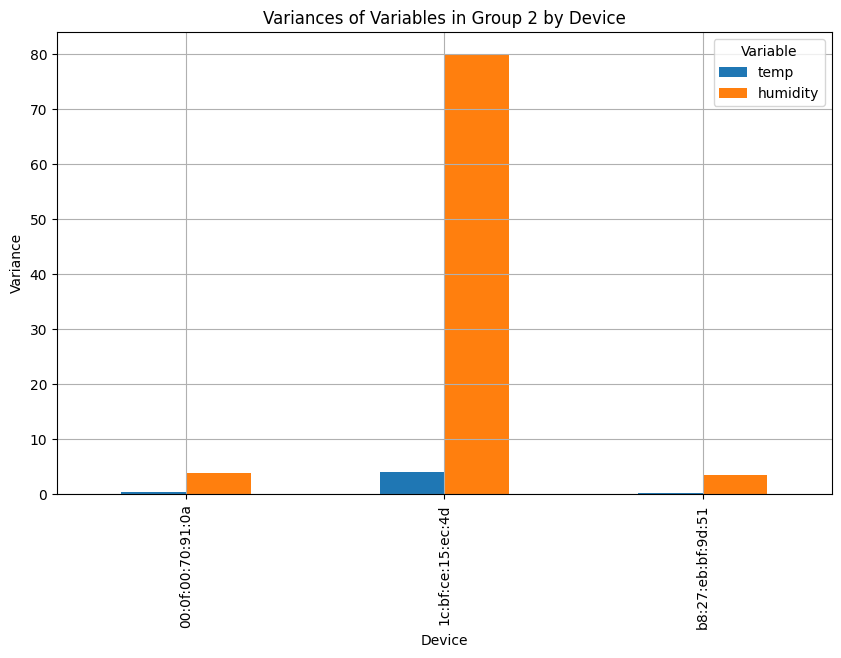

In [7]:
numerical_cols = ["co","lpg","smoke","temp", "humidity"]
group_col = "device"

groups = df.groupby(group_col)

grouped = groups[numerical_cols]

means = grouped.mean()
variances = grouped.var()

print(means)
print("\n")
print(variances)
print("\n")

# Here for visualization purpose we will seperate out our variables in two 
# groups as not all variables are on same scale, and thus will not be visible
# clearly on a bar plot.
# Group 1 : "co","lpg","smoke"
# Group 2 : "temp", "humidity"
means_group_one = means[numerical_cols[:3]]
means_group_two = means[numerical_cols[3:]]
variances_group_one = variances[numerical_cols[:3]]
variances_group_two = variances[numerical_cols[3:]]

means_group_one.plot(kind='bar', figsize=(10, 6))
plt.title('Means of Variables in Group 1 by Device')
plt.ylabel('Mean Value')
plt.xlabel('Device')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

means_group_two.plot(kind='bar', figsize=(10, 6))
plt.title('Means of Variables in Group 2 by Device')
plt.ylabel('Mean Value')
plt.xlabel('Device')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

variances_group_one.plot(kind='bar', figsize=(10, 6))
plt.title('Variances of Variables in Group 1 by Device')
plt.ylabel('Variance')
plt.xlabel('Device')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

variances_group_two.plot(kind='bar', figsize=(10, 6))
plt.title('Variances of Variables in Group 2 by Device')
plt.ylabel('Variance')
plt.xlabel('Device')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

Based on the above plots, there are few observations to note :-
1) **co** and **lpg** have around same means and variance for all three devices.
2) **smoke** has a very high mean and variance compared to **co** and **lpg** for all three devices.
3) **smoke** for device 1 (left most) has a very high variance compared to variance of other two devices.
4) **temp** variance for device 2 (middle one) is very high compared to other two devices.

### (b)

In [8]:
def standardization(arr):
    mean = np.mean(arr)
    std  = np.std(arr)
    return (arr - mean)/(std)

for col in numerical_cols:
    df[col] = groups[col].transform(standardization)


### (c)

In [9]:
categorical_cols = ["device","light","motion"]
df = pd.get_dummies(df,columns=categorical_cols)

### (d)

In [10]:
df.head(20)

,ts,co,humidity,lpg,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080796,0.098428,-1.093494,-1.091262,0.871612,False,False,True,True,False,True,False
1,1.594512e+09,-0.464453,0.281223,-0.458335,-0.460394,0.524164,True,False,False,True,False,True,False
2,1.594512e+09,-1.044867,0.045488,-1.056110,-1.054139,0.664101,False,False,True,True,False,True,False
3,1.594512e+09,0.687054,1.664636,0.696251,0.694636,0.480892,False,True,False,False,True,True,False
4,1.594512e+09,-1.060347,0.045488,-1.072212,-1.070130,0.664101,False,False,True,True,False,True,False
5,1.594512e+09,0.649530,1.787613,0.659046,0.657373,0.480892,False,True,False,False,True,True,False
6,1.594512e+09,-1.044844,0.045488,-1.056086,-1.054116,0.664101,False,False,True,True,False,True,False
7,1.594512e+09,-0.398158,0.281223,-0.383563,-0.387060,0.524164,True,False,False,True,False,True,False
8,1.594512e+09,0.507422,1.787613,0.517890,0.516041,0.480892,False,True,False,False,True,True,False
9,1.594512e+09,-1.055170,0.045488,-1.066827,-1.064782,0.664101,False,False,True,True,False,True,False


### (e)

The **ts** variable as by definition from the given data set is the timestamp at a particular time when the sensor records data. It is currently in numerical format but can be converted into appropriate timestamp format. It can be used to analyze the variables transformation over a period of time.

## Problem 1.3

In [11]:
co_cidx = -1
humidity_cidx = -1
lpg_cidx = -1
smoke_cidx = -1
temp_cidx = -1

for i,col in enumerate(df.columns):
    if col=="co":
        co_cidx = i
    if col=="humidity":
        humidity_cidx = i
    if col=="lpg":
        lpg_cidx = i
    if col=="smoke":
        smoke_cidx = i
    if col=="temp":
        temp_cidx = i

def compute_stats_features(row):
    f_mean  = np.mean(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]]))
    f_gmean = sps.gmean(np.abs(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]])))
    f_hmean = sps.hmean(np.abs(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]])))
    f_var   = np.var(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]]))
    f_kurt  = sps.kurtosis(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]]))
    f_skew  = sps.skew(np.array([row[co_cidx],row[humidity_cidx],row[lpg_cidx],row[smoke_cidx],row[temp_cidx]]))
    return np.array([f_mean,f_gmean,f_hmean,f_var,f_kurt,f_skew])
    
stats_df = pd.DataFrame(np.apply_along_axis(compute_stats_features, axis=1, arr=df),columns=["mean","gmean","hmean","variance","kurtosis","skewness"])

display(stats_df.head(40))

,mean,gmean,hmean,variance,kurtosis,skewness
0,-0.459102,0.643853,0.355541,0.654045,-1.268521,0.673607
1,-0.115559,0.428504,0.417689,0.184963,-1.626008,0.504156
2,-0.489105,0.511870,0.189810,0.513061,-1.365727,0.626984
3,0.844694,0.767320,0.713109,0.174812,0.083334,1.347752
4,-0.498620,0.516487,0.190115,0.523828,-1.374738,0.622674
5,0.846891,0.752887,0.692809,0.225814,0.157954,1.420887
6,-0.489091,0.511863,0.189809,0.513045,-1.365713,0.626990
7,-0.072679,0.387291,0.379767,0.156578,-1.589427,0.520788
8,0.761972,0.650613,0.589736,0.263160,0.246717,1.497492
9,-0.495438,0.514946,0.190014,0.520214,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [12]:
die_outcomes = [1,2,3,4,5,6]
n_samples = 10000

sims = np.random.choice(die_outcomes,size=n_samples)

# Calculates cumulative sum i.e calculates Di for all i in (1,n_samples)
sims_cumsum = np.cumsum(sims)

# Creates array sample size n for Di for all i in (1,n_samples)
n_arr = np.arange(1,n_samples+1)

empirical_means = sims_cumsum / n_arr

### (b)

In [13]:
fair_die_prob = np.float64(1/6)

# Calculates expected value for 6 sided fair die
expected_value = np.sum(np.array(die_outcomes)*fair_die_prob)

abs_discrepency = np.abs(empirical_means - expected_value)

### (c)



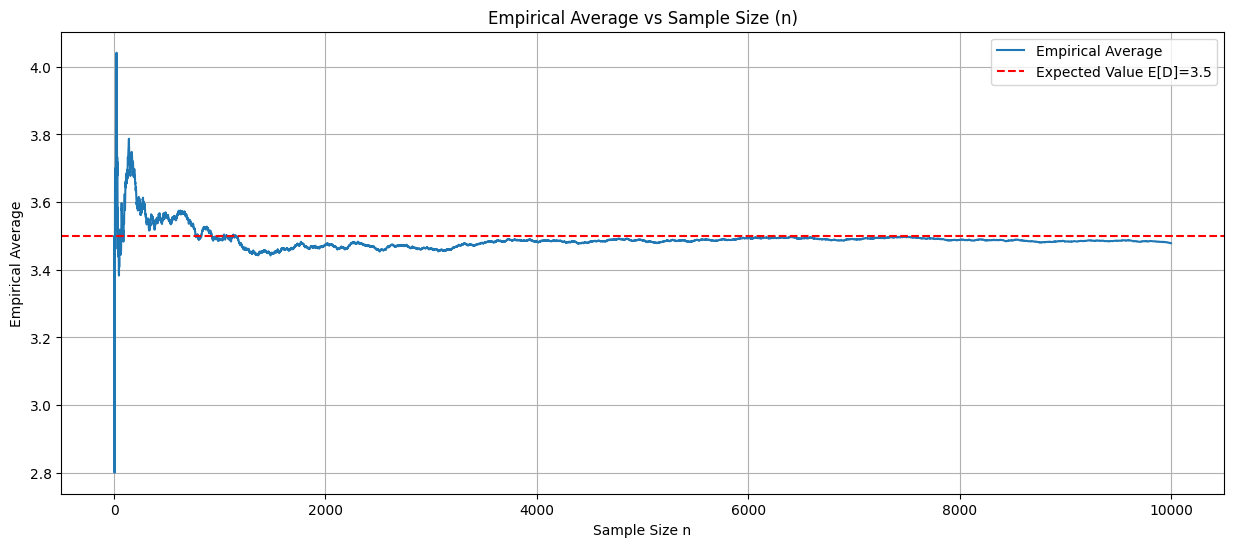

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(n_arr, empirical_means, label="Empirical Average")
plt.axhline(y=expected_value, color='r', linestyle='--', label=f'Expected Value E[D]={expected_value}')
plt.xlabel("Sample Size n")
plt.ylabel("Empirical Average")
plt.title("Empirical Average vs Sample Size (n)")
plt.legend()
plt.grid(True)
plt.show()

According to the plot, we can see that the sample average, converges to the true average or expected value of a fair dice roll as our sample size grows. As the **blue** line which is the sample average overlaps with the **red** line which is the true average for large sample sizes.

### (d)

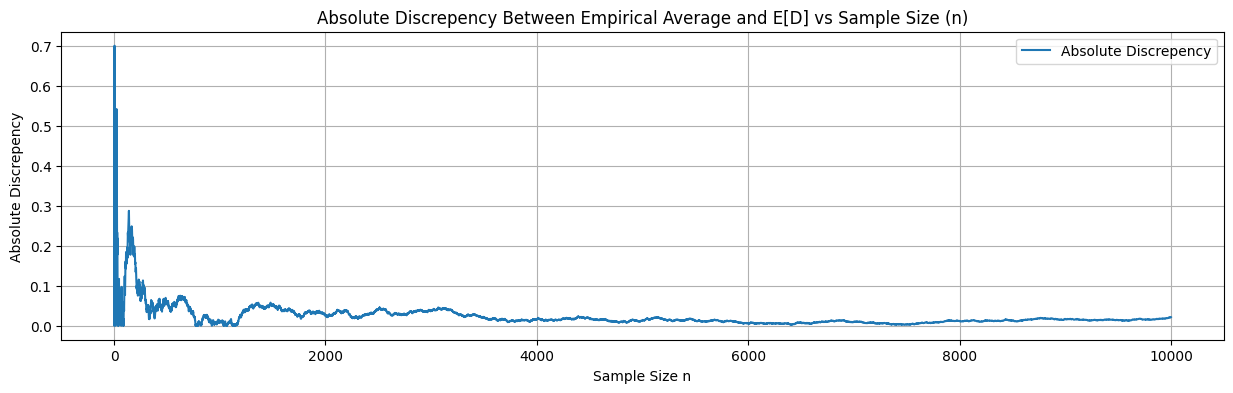

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(n_arr, abs_discrepency, label="Absolute Discrepency")
plt.xlabel("Sample Size n")
plt.ylabel("Absolute Discrepency")
plt.title("Absolute Discrepency Between Empirical Average and E[D] vs Sample Size (n)")
plt.legend()
plt.grid(True)
plt.show()

According to **Law of large numbers (LLN)**, states that the average of the results obtained from a large number of independent random samples converges to the true value, if it exists. Thus LLN guarantees that the empirical average of a random sample will converge to its expected value as the sample size grows. 

This phenomenon can be observed in our dice simulation, where the absolute difference between sample average and the true average or expected value of a fair dice roll, can be seen diminishing as our sample size grows. As the **blue** line which is the absolute difference converges towards zero for large sample sizes, and thus essentially, sample average and true average becoming equal.

## Problem 2.2

### (a)

In [16]:
die_outcomes = [1,2,3,4,5,6]
die_probs = [0.1,0.1,0.1,0.1,0.1,0.5]
n_samples = 10000

sims = np.random.choice(die_outcomes,size=n_samples,p=die_probs)

# Calculates cumulative sum i.e calculates Di for all i in (1,n_samples)
sims_cumsum = np.cumsum(sims)

# Creates array sample size n for Di for all i in (1,n_samples)
n_arr = np.arange(1,n_samples+1)

empirical_means = sims_cumsum / n_arr

### (b)

In [17]:
# Calculates expected value for unfair die with the given probabilities
expected_value = np.sum(np.array(die_outcomes)*np.array(die_probs))

abs_discrepency = np.abs(empirical_means - expected_value)

### (c)

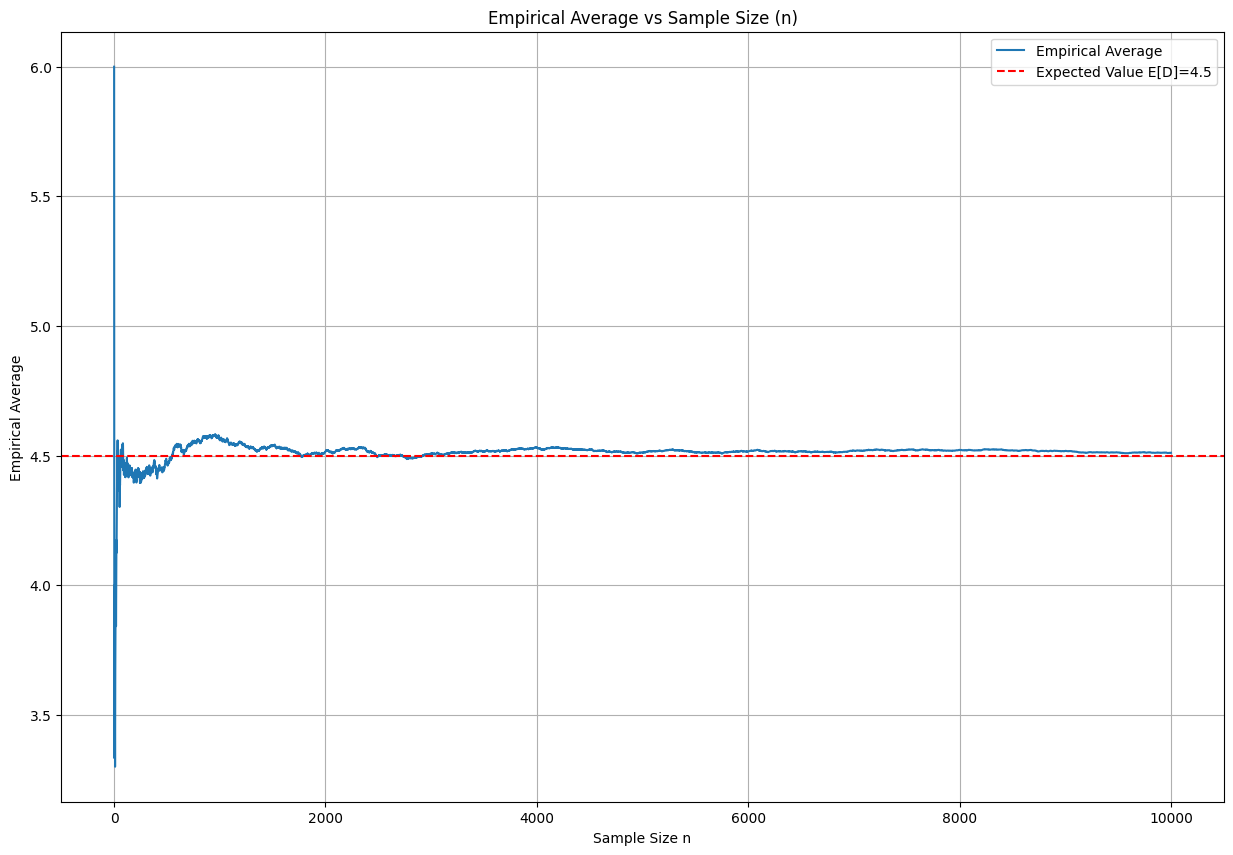

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(n_arr, empirical_means, label="Empirical Average")
plt.axhline(y=expected_value, color='r', linestyle='--', label=f'Expected Value E[D]={expected_value}')
plt.xlabel("Sample Size n")
plt.ylabel("Empirical Average")
plt.title("Empirical Average vs Sample Size (n)")
plt.legend()
plt.grid(True)
plt.show()

According to the plot, we can again see a similar trend as what we saw in case of fair dice simulation, even in case of unfair dice simulation we can see that the sample average, converges to the true average or expected value of a fair dice roll as our sample size grows. As the **blue** line which is the sample average overlaps with the **red** line which is the true average for large sample sizes. Thus this convergence happens irrespective of the probabilities of the outcomes in an experiment.

### (d)

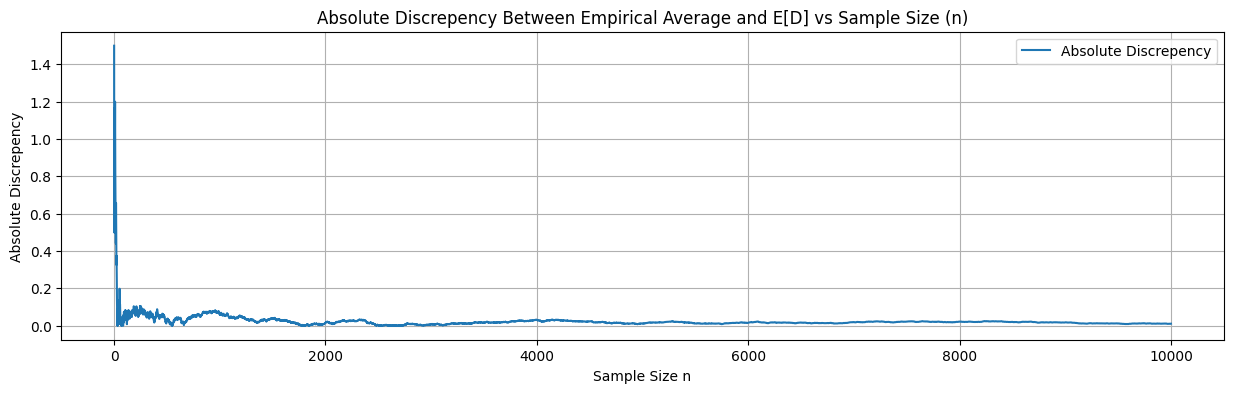

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(n_arr, abs_discrepency, label="Absolute Discrepency")
plt.xlabel("Sample Size n")
plt.ylabel("Absolute Discrepency")
plt.title("Absolute Discrepency Between Empirical Average and E[D] vs Sample Size (n)")
plt.legend()
plt.grid(True)
plt.show()

Here in this plot, we can again see a similar trend as what we saw in case of fair dice simulation, even in case of unfair dice simulation, we can see that the absolute difference between sample average and the true average or expected value of a fair dice roll, can be seen diminishing as our sample size grows. As the blue line which is the absolute difference converges towards zero for large sample sizes, and thus essentially, sample average and true average becoming equal. Therefore, we can conclude that the **LLN** holds and is true, irrespective of the probabilities of outcomes in an experiment, and for any experiment, given large sample size LLN can be observed.